<a href="https://colab.research.google.com/github/caue22/TCC_Ransonware/blob/main/Usando_modelo_treinado_Arvore_de_Decis%C3%A3o_balanceado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.2 when using version 1.6.1. This might lead to breaking code or 

Precision: 96.73%
Recall: 96.69%
F1-Score: 96.70%
AUC-ROC: 97.60%
Confusion Matrix:
[[11499   141    26]
 [  126 11289   248]
 [   19   602 11164]]


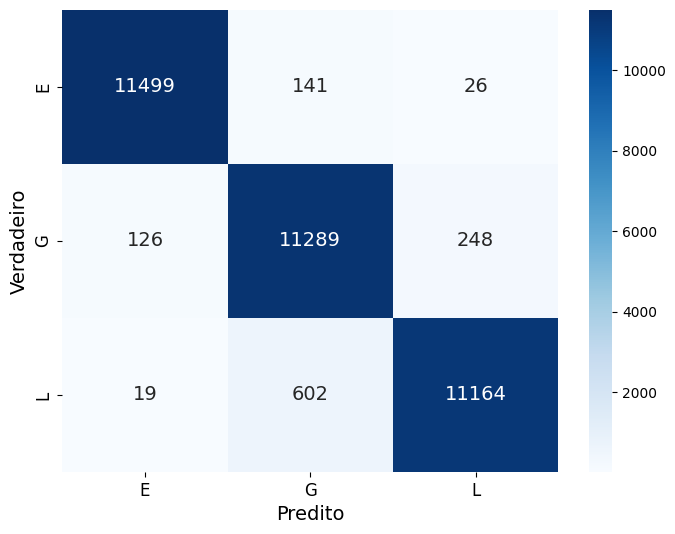

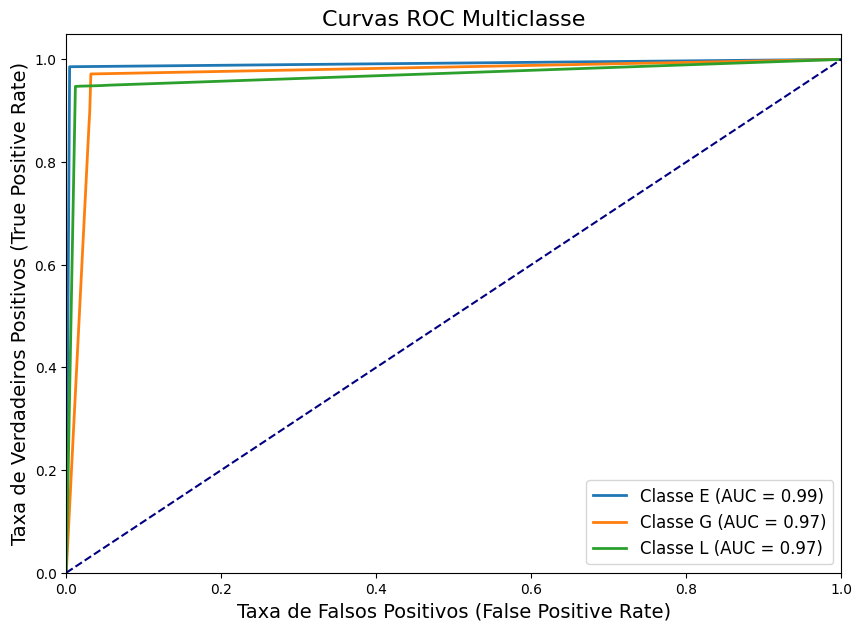

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho para o modelo salvo e o conjunto de teste
model_path = '/content/drive/MyDrive/Modelos/decision_tree_model_balanceado.pkl'
label_encoder_path = '/content/drive/MyDrive/Modelos/label_encoder_decision_tree_balanceado.pkl'
csv_test_path = '/content/drive/MyDrive/Modelos/conjunto_teste_decision_tree_balanceado.csv'

# Carregar o modelo salvo
model_pipeline = joblib.load(model_path)

# Carregar o LabelEncoder salvo
label_encoder = joblib.load(label_encoder_path)

# Carregar o conjunto de teste salvo (sem a coluna 'true_label')
X_test_with_labels = pd.read_csv(csv_test_path)

# Separar a coluna 'true_label' e as características
y_test = label_encoder.transform(X_test_with_labels['true_label'])
X_test = X_test_with_labels.drop(columns=['true_label', 'index'])

# Fazer previsões com o modelo carregado
y_pred = model_pipeline.predict(X_test)

# Calcular métricas de avaliação
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC-ROC
y_pred_proba = model_pipeline.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

# Exibir os resultados
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {roc_auc * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plotar a matriz de confusão com rótulos maiores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            annot_kws={"size": 14})  # Aumentar o tamanho dos números na matriz
plt.xlabel("Predito", fontsize=14)
plt.ylabel("Verdadeiro", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Binarizar as classes para multiclasse
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Criar um dicionário para armazenar as curvas ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcular a curva ROC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar todas as curvas ROC com rótulos maiores
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Classe {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})', linewidth=2)

# Plotar a linha de sorte (classificação aleatória)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)', fontsize=14)
plt.title('Curvas ROC Multiclasse', fontsize=16)
plt.legend(loc="lower right", fontsize=12)  # Aumentar o tamanho da legenda
plt.show()
